In [1]:
# https://github.com/kaonashi-tyc/zi2zi

# -*- coding: utf-8 -*-

import argparse
import sys
import glob
import numpy as np
import io, os
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
import collections

SRC_PATH = './fonts/source/'
TRG_PATH = './fonts/target/'
OUTPUT_PATH = './dataset/'


def draw_single_char(ch, font, canvas_size):
    image = Image.new('L', (canvas_size, canvas_size), color=255)
    drawing = ImageDraw.Draw(image)
    w, h = drawing.textsize(ch, font=font)
    drawing.text(
        ((canvas_size-w)/2, (canvas_size-h)/2),
        ch,
        fill=(0),
        font=font
    )
    flag = np.sum(np.array(image))
    
    # 해당 font에 글자가 없으면 return None
    if flag == 255 * 128 * 128:
        return None
    
    return image


def draw_example(ch, src_font, dst_font, canvas_size):
    dst_img = draw_single_char(ch, dst_font, canvas_size)
    
    # 해당 font에 글자가 없으면 return None
    if not dst_img:
        return None
    
    src_img = draw_single_char(ch, src_font, canvas_size)
    example_img = Image.new("RGB", (canvas_size * 2, canvas_size), (255, 255, 255)).convert('L')
    example_img.paste(dst_img, (0, 0))
    example_img.paste(src_img, (canvas_size, 0))   
    return example_img


def draw_handwriting(ch, src_font, canvas_size, dst_folder, label, count):
    dst_path = dst_folder + "%d_%04d" % (label, count) + ".png"
    dst_img = Image.open(dst_path)
    src_img = draw_single_char(ch, src_font, canvas_size)
    example_img = Image.new("RGB", (canvas_size * 2, canvas_size), (255, 255, 255)).convert('L')
    example_img.paste(dst_img, (0, 0))
    example_img.paste(src_img, (canvas_size, 0))
    return example_img

#draw_handwriting('가', 'source_font.ttf', 32, './fonts/', 1, 10)



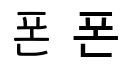

In [2]:

src_font = ImageFont.truetype(SRC_PATH + '/source_font.ttf', round(512* 0.1))
dst_font = ImageFont.truetype(TRG_PATH + '/42.ttf', round(512 * 0.1))

draw_example('폰', src_font, dst_font, 64)

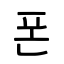

In [3]:
draw_single_char('폰', dst_font, 64)

In [21]:
src_font

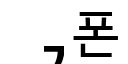

In [29]:
dst_folder = TRG_PATH
draw_handwriting('폰', src_font, 64, dst_folder, 6, 14)

In [4]:
char_list = []
f = open("./2350-common-hangul.txt", 'r')
while True:
    line = f.readline().rstrip()
    if not line: break
    char_list.append(line)
f.close()

In [5]:
len(char_list)

2350

In [7]:
from glob import glob
import numpy as np
from PIL import Image

In [9]:
ttf_target = glob(TRG_PATH+"/*")
ttf_target[0]

'./fonts/target/01.ttf'

In [12]:
TRG_PATH

'./fonts/target/'

In [17]:
ttf_target[0].split('/')[3].split('.')[0]

'01'

In [19]:

for num, i in enumerate(ttf_target): 
    dst_font = ImageFont.truetype(i, round(512 * 0.1))
    for cnt, t in enumerate(char_list):
        image = draw_single_char(t, dst_font, 128)
        fname = TRG_PATH + "%d_%04d" % (num, cnt) + ".png"
        image.save(fname, 'png')
        

In [15]:
label=1
count=1

print(TRG_PATH + "%d_%04d" % (label, count) + ".png")

./fonts/target/1_0001.png
